<a href="https://colab.research.google.com/github/DaniRodri17/rodri/blob/main/page_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.head(3)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716


In [ ]:
sorted_df = df.sort_values(by='value', ascending=False)
top_2 = round(sorted_df.value_counts().sum() * 0.025)
top_2

33

In [ ]:
top = sorted_df[:top_2]
botom = sorted_df[-top_2:]

df.drop(top.index, inplace=True)
df.drop(botom.index, inplace=True)

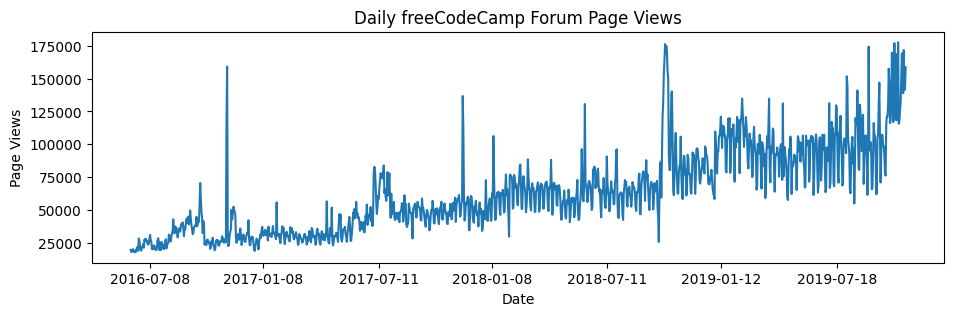

In [ ]:
plt.figure(figsize=(11, 3))
plt.plot(df.index, df.value)
plt.title('Daily freeCodeCamp Forum Page Views')
plt.xlabel('Date')
plt.ylabel('Page Views')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))


plt.show()

In [ ]:
av = sns.load_dataset('tips')
av

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
b = av.groupby('day')['total_bill'].mean()

b

/tmp/ipython-input-2187371666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = av.groupby('day')['total_bill'].mean()


,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


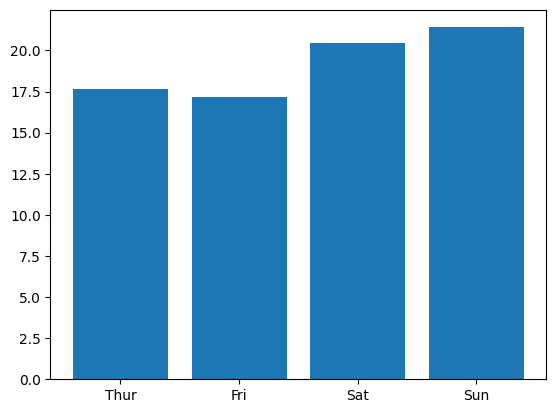

In [ ]:
plt.bar(b.index, b.values)
plt.show()

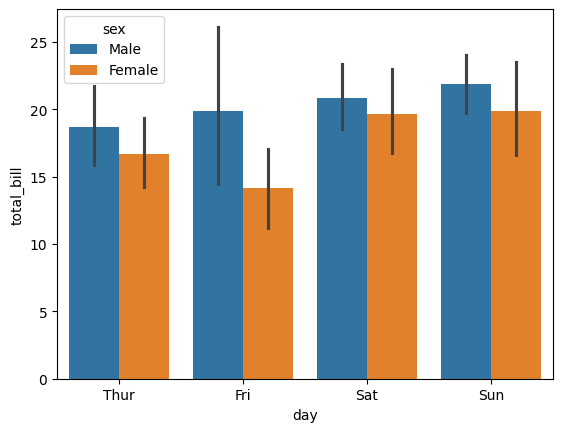

In [ ]:
sns.barplot(x='day', y='total_bill', hue='sex', data = av);
plt.show()

In [ ]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day
df['month_name'] = pd.DatetimeIndex(df.index).strftime('%b')

df

,value,year,month,day,month_name
date,,,,,
2016-05-19,19736,2016,5,19,May
2016-05-26,18060,2016,5,26,May
2016-05-27,19997,2016,5,27,May
2016-05-28,19044,2016,5,28,May
2016-05-29,20325,2016,5,29,May
...,...,...,...,...,...
2019-11-24,138875,2019,11,24,Nov
2019-11-29,171584,2019,11,29,Nov
2019-11-30,141161,2019,11,30,Nov


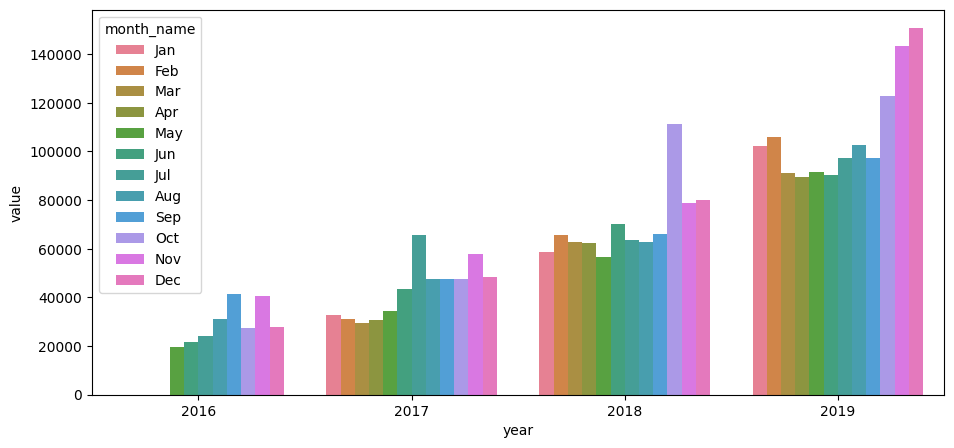

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(11, 5))
sns.barplot(x='year', y='value', hue='month_name',errorbar=None, data=df);
plt.show()